# Imports


In [2]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import os
import glob
import numpy as np
import essentia.standard as es
import matplotlib.pyplot as plt

# Loading and Declaring the Data


In [3]:
data_folder = "rsf_kobol_expander_2-vco/audio/vco1"
pot_folders = sorted(glob.glob(os.path.join(data_folder, "*")))
pot_values = np.sort(
    np.array([float(os.path.basename(folder)) for folder in pot_folders])
)

freq_files = sorted(glob.glob(os.path.join(pot_folders[0], "*.wav")))
freq_values = np.sort(
    np.array(
        [float(os.path.splitext(os.path.basename(file))[0]) for file in freq_files]
    )
)

num_entries = 500

first_data = es.MonoLoader(filename=freq_files[0])()[:num_entries]

data = np.empty((len(freq_values), len(pot_values), num_entries))
data[0, 0] = first_data

for j, pot_folder in enumerate(pot_folders):
    for i, freq_file in enumerate(sorted(glob.glob(os.path.join(pot_folder, "*.wav")))):
        if i == 0 and j == 0:
            continue
        audio_data = es.MonoLoader(filename=freq_file)()[:num_entries]
        data[i, j] = audio_data

data = np.transpose(data, (0, 1, 2))

# Computing the Prediction


In [4]:
def prediction(freq, pot_value):
    interpolated_data = np.empty(num_entries)
    for i in range(num_entries):
        f = RegularGridInterpolator(
            (freq_values, pot_values), data[:, :, i], method="linear"
        )
        interpolated_data[i] = f(np.array([[freq, pot_value]]))
    return interpolated_data

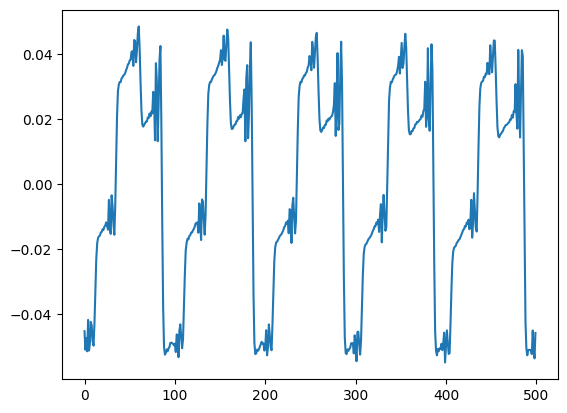

In [20]:
predicted_wave = prediction(freq=5.0, pot_value=1.0)
plt.plot(predicted_wave)
plt.show()